number 1

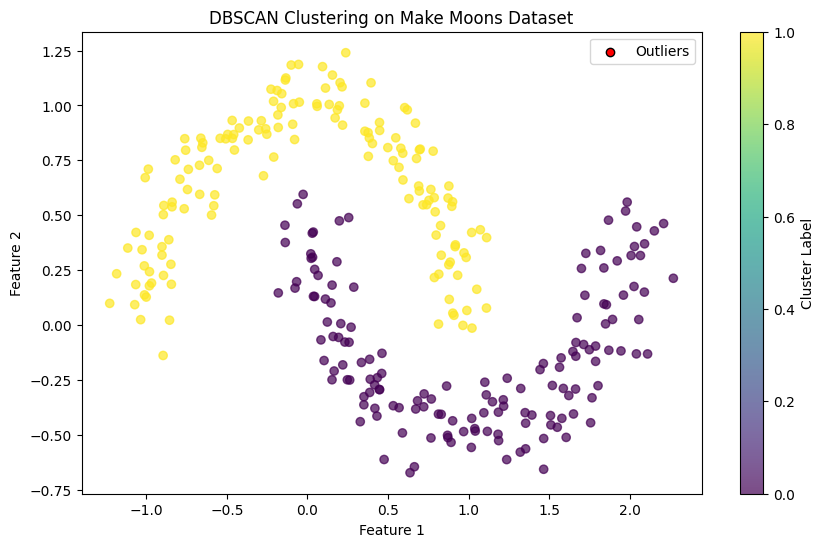

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 데이터셋 생성
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# DBSCAN 모델 학습
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

# 이상치 탐지: 클러스터 레이블이 -1인 데이터 포인트가 이상치로 간주됨
outliers = X[clusters == -1]

# 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', edgecolor='k')
plt.title('DBSCAN Clustering on Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



number 2


데이터 미리보기:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8

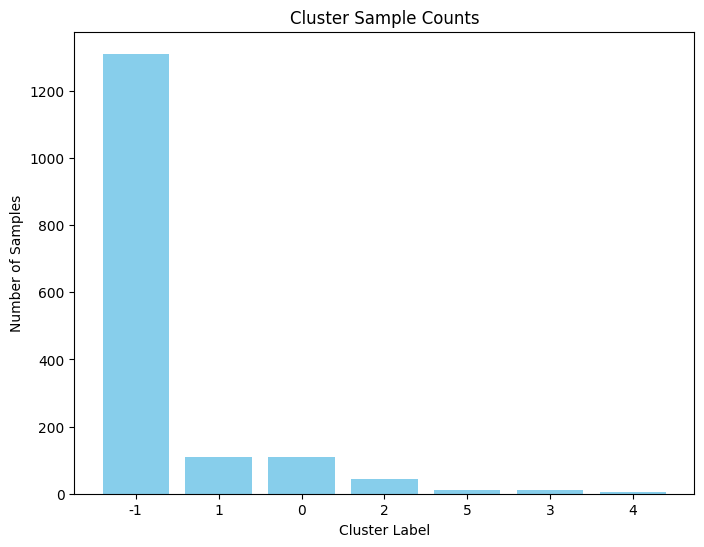

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 데이터 이거 맞아요??
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# DBSCAN 모델 학습
eps_value = 1.2  # eps 값은 데이터셋 특성에 맞게 조정
min_samples_value = 10  # 최소 샘플 수 설정
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(data_scaled)

# 클러스터 및 이상치 정보
data['Cluster'] = clusters  # 클러스터 레이블 추가
outliers = data[data['Cluster'] == -1]  # 클러스터 -1인 데이터가 이상치
num_outliers = len(outliers)  # 이상치 개수
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # 클러스터 개수 (-1 제외)

# 클러스터별 샘플 수
cluster_counts = data['Cluster'].value_counts()

# 출력
print(f"클러스터 개수: {num_clusters}")
print(f"이상치 개수: {num_outliers}")
print("클러스터별 샘플 수:")
print(cluster_counts)

# 이상치 비율 시각화
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index.astype(str), cluster_counts.values, color='skyblue')
plt.title('Cluster Sample Counts')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.show()
